<a href="https://colab.research.google.com/github/AnoshkinDV/Analysis-Data/blob/master/task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [193]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


1.В переменной df находится датафрэйм. Запишите в переменную  df_shape строку с информацией о том, сколько строк и столбцов он содержит, в следующем виде:
'df has y rows and x columns'
где y — число строк, а x — число колонок

In [4]:
rows,cols=df.shape

In [5]:
 print(f'df has {rows} rows and {cols} columns')

df has 30 rows and 4 columns


2.Сохраните в переменную na_number серию, в которой для каждой колонки будет указано, сколько пропущенных значений она содержит.


In [29]:
df = pd.DataFrame({'client_id':np.random.randint(1,1000,30),
                   'sex':np.random.choice([0,1],30),
                   'wealth':np.random.choice(['low',None,'high'],30),
                   'age':np.random.randint(20,70,30)
                   })

In [11]:
df.head(
    5
)

,client_id,sex,wealth,age
0,166,1,high,25
1,602,0,high,54
2,163,0,low,20
3,913,1,low,32
4,780,0,low,50


In [14]:
na_number = df.isna().sum() # Сумма пропущенных значений для каждой колонки

In [15]:
na_number

,0
client_id,0
sex,0
wealth,8
age,0


3.Сохраните в переменную df_types типы данных каждой колонки датафрэйма df.

In [30]:
df_types = df.dtypes

In [37]:
df_types

,0
client_id,int64
sex,int64
wealth,object
age,int64


4.Внезапно оказалось, что в колонке age значения хранятся в виде строк! Поменяйте тип значений на целочисленный в этой колонке датафрэйма df.

In [40]:
df = df.astype({'age':'str'})

In [41]:
df.dtypes

,0
client_id,int64
sex,int64
wealth,object
age,object


In [48]:
df = df.astype({'age':'int'})
# df.age = df.age.astype(str)

In [49]:
df.dtypes

,0
client_id,int64
sex,int64
wealth,object
age,int64


5.Как выяснилось, для дальнейшего анализа нам не понадобятся колонки sex и age – удалите их из датафрэйма.

In [51]:
df = df.drop(['sex','age'],axis=1) #axis=1 значит удаление колонок, axis=0 значит удаление столбцов

In [52]:
df

,client_id,wealth
0,328,None
1,723,None
2,489,None
3,140,None
4,14,low
5,206,None
6,376,None
7,264,None
8,384,high
9,962,high


6.А теперь проверим, есть ли в нашей таблице df дубликаты по полю client_id.
Сохраните в переменную df датафрейм, в котором не будет дубликатов по колонке client_id, оставив первую строку с id

In [54]:
df.duplicated('client_id').sum()

0

In [55]:
df.drop_duplicates()

,client_id,wealth
0,328,None
1,723,None
2,489,None
3,140,None
4,14,low
5,206,None
6,376,None
7,264,None
8,384,high
9,962,high


7.А сейчас ненадолго вернемся к чистому Python.
В списке numbers содержатся числа. Добавьте через цикл в список positive_numbers положительные числа из numbers. Если вам попался 0, то нужно прекратить этот цикл.
Например,
numbers = [1, -2, 3, 0, -3, 2]
Тогда positive_numbers должен быть:
positive_numbers = [1, 3]
Hint: список numbers  уже создан.

In [56]:
numbers = [1, -2, 3, 0, -3, 2]

In [57]:
positive_number = []
for i in numbers:
  if i == 0:
    break
  if i>0:
     positive_number.append(i)
print(positive_number)


[1, 3]


8.Продолжим анализ данных по поездкам на такси из Перу. В предыдущем уроке вы изучили распределения оценок водителей и клиентов. Теперь посмотрим на колонки со временем!
Ссылка на датасет находится в переменной path_to_file. Сохраните данные в переменную taxi, разделитель — ;.
Затем приведите столбцы start_at, end_at, arrived_at к формату даты, используя pd.to_datetime(). Отфильтруйте данные и оставьте наблюдения со статусом заказа "asap" и "reserved" (start_type) .


In [164]:
taxi = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/3_taxi_peru.csv',
                   encoding='windows-1251',
                   sep=';')
taxi.head()
taxi.shape

(23111, 19)

In [165]:
# Работаем вдвое эффективнее! 👯‍♂️
taxi[['start_at','end_at','arrived_at']] = taxi[['start_at','end_at','arrived_at']].apply(pd.to_datetime)
# for col in ['start_at','end_at','arrived_at']:
#   taxi[col]=pd.to_datetime(taxi[col])

In [166]:
taxi.dtypes

,0
journey_id,object
user_id,object
driver_id,object
taxi_id,object
icon,object
start_type,object
start_at,datetime64[ns]
start_lat,object
start_lon,object
end_at,datetime64[ns]


In [167]:
taxi = taxi.query("start_type=='asap' or start_type=='reserved'")
taxi.shape
# taxi = taxi.loc[taxi.start_type.isin(['asap','reserved'])]

(23091, 19)

8.Создайте колонку wait_time, в которой будет храниться разница между временем подачи машины (arrived_at) и временем заказа (start_at) в минутах.
Чтобы сконвертировать полученный результат в минуты, можно использовать
метод  .astype('timedelta64[m]').

In [171]:
taxi['wait_time']=(taxi['arrived_at']-taxi['start_at']).astype('timedelta64[s]') # Применение astype идёт к результирующей серии

In [172]:
taxi['wait_time']

,wait_time
0,0 days 00:18:00
1,NaT
2,NaT
3,NaT
4,-1 days +23:55:00
...,...
23106,0 days 00:00:00
23107,0 days 00:13:00
23108,0 days 00:09:00
23109,-1 days +23:53:00


9.Посмотрим, какие водители опаздывали на заказы к определенному времени (start_type == 'reserved'). Опозданием считается время ожидания wait_time > 0.0.
Сгруппируйте отфильтрованные данные по driver_id и в качестве ответа укажите id водителя, который опоздал на заказ интересующего нас типа наибольшее число раз

In [175]:
taxi.query("start_type == 'reserved' and wait_time.dt.total_seconds() > 0")
# taxi = taxi.loc[(taxi["start_type"] == "reserved") & (taxi["wait_time"].dt.total_seconds() > 0)]


,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time
11,af7a0d5b65562d9e4f7749317efb1a3a,7abecd4f47c2c1d5390d86eb22181c90,d04f1a596fe4a582f48e6eb2f9e8f617,d04f1a596fe4a582f48e6eb2f9e8cceb,executive,reserved,2010-11-28 03:15:00,"-12,10128779","-77,00463697",2010-11-28 03:37:00,"-12,10112256","-77,00418301",drop off,"-12,1011259","-77,0041831",2010-11-28 03:22:00,Android,NaN,4.0,0 days 00:07:00
51,e1b5a14977e84b1900b5b69e040c3de1,1e44c0fd0a266c3719ff30410baa07cd,ae06c34243f741e203e97c48ebcbd9da,f622a9397b85b5c9c0ef938c5d592020,executive,reserved,2010-10-12 19:45:00,"-12,11184692","-77,03222656",2010-10-12 20:49:00,"-12,02226257","-77,109375",drop off,"-12,02907305","-77,08317745",2010-10-12 19:56:00,iPhone,NaN,5.0,0 days 00:11:00
67,eb06449983dd990ff162c0ad990909ba,933a5cf7834b12121755b8586b53a083,406921adcca37705ef527b4246c0cfea,406921adcca37705ef527b4246c10d2c,executive,reserved,2010-06-01 22:00:00,"-12,12078476","-76,97079468",2010-06-01 22:42:00,"-12,07870483","-77,06329346",drop off,"-12,11143646","-76,99240794",2010-06-01 22:01:00,iPhone,4.0,5.0,0 days 00:01:00
83,cd6a65a00f3ac91060d336a9f037f7f6,cb6ea169cefc7a0a5f1f8bd8ebbe3223,baacf396f773709519bbde35a5eab861,baacf396f773709519bbde35a585d91b,executive,reserved,2010-08-16 22:30:00,"-12,10181985","-76,97150599",2010-08-16 22:57:00,"-12,08880914","-76,99084405",drop off,"-12,06300311","-76,94575123",2010-08-16 22:33:00,Android,0.0,4.0,0 days 00:03:00
157,e1332f68e81526e498e4d845233a17ee,be2d7041cb5bae52cf3edaaf03798426,65b6f3b7075270499ddd0f1dc1130459,f78d50ea4f0c83a4a302d9fa82264b02,executive,reserved,2010-03-27 23:30:00,"-12,0966369","-77,0295319",2010-03-28 00:25:00,"-12,1249782","-77,0048048",drop off,"-12,08623295","-77,03547408",2010-03-27 23:31:00,web,NaN,5.0,0 days 00:01:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23044,883360491194dd3b866c897b2586a1d7,406921adcca37705ef527b4246c1370e,27c157e605c56c7df70c605963e1d386,27c157e605c56c7df70c605963e1c9b7,executive,reserved,2010-02-14 13:45:00,"-12,0918521","-77,0519091",2010-02-14 14:19:00,"-12,1593476","-77,0232917",drop off,"-12,0735807","-77,04195549",2010-02-14 13:49:00,web,NaN,NaN,0 days 00:04:00
23047,88a0d8a123b3c1b2f39bec89da7b30ae,406921adcca37705ef527b4246c12e83,406921adcca37705ef527b4246c19db3,406921adcca37705ef527b4246c1a5c6,executive,reserved,2010-05-07 13:20:00,"-12,0918423","-77,0421839",2010-05-07 14:13:00,"-12,0914361","-77,0857564",drop off,"-12,03970949","-77,05231815",2010-05-07 13:21:00,web,NaN,5.0,0 days 00:01:00
23053,8b9ae8141b48ed1643e02dbc76aa2290,0f0ffd9676b4aa664f8b88b76ca90cf4,406921adcca37705ef527b4246c19db3,406921adcca37705ef527b4246c1a5c6,executive,reserved,2010-05-09 01:30:00,"-12,0780836","-77,0906339",2010-05-09 02:50:00,"-12,019468","-77,107768",drop off,"-12,05495955","-77,05101171",2010-05-09 01:40:00,web,NaN,NaN,0 days 00:10:00
23063,4a645cbfd25b64d34f738808637353ca,4a645cbfd25b64d34f738808634b36bf,eeb07ac5409c082354b923689341b9ec,aba044a086704ad7e9dc66b8c926408d,executive,reserved,2010-04-16 15:15:00,"-12,0770342","-76,9885396",2010-04-16 15:40:00,"-12,1088702","-76,9886223",drop off,"-12,04602095","-77,02585903",2010-04-16 15:18:00,web,NaN,NaN,0 days 00:03:00


In [176]:
taxi.query("start_type == 'reserved' and wait_time.dt.total_seconds() > 0").driver_id.value_counts().idxmax()

'406921adcca37705ef527b4246c0cfea'

10.Добавьте столбец month, где будет храниться номер месяца, в котором был сделан заказ (start_at),  и столбец weekday – название дня недели.
Как извлечь нужное значение из даты? .dt.strftime('%A') – извлечь день недели в формате названия (подробнее о strftime здесь).
Данные загружены в taxi и отфильтрованы, как в 8 шаге.

In [177]:
taxi.head()


,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time
11,af7a0d5b65562d9e4f7749317efb1a3a,7abecd4f47c2c1d5390d86eb22181c90,d04f1a596fe4a582f48e6eb2f9e8f617,d04f1a596fe4a582f48e6eb2f9e8cceb,executive,reserved,2010-11-28 03:15:00,"-12,10128779","-77,00463697",2010-11-28 03:37:00,"-12,10112256","-77,00418301",drop off,"-12,1011259","-77,0041831",2010-11-28 03:22:00,Android,NaN,4.0,0 days 00:07:00
51,e1b5a14977e84b1900b5b69e040c3de1,1e44c0fd0a266c3719ff30410baa07cd,ae06c34243f741e203e97c48ebcbd9da,f622a9397b85b5c9c0ef938c5d592020,executive,reserved,2010-10-12 19:45:00,"-12,11184692","-77,03222656",2010-10-12 20:49:00,"-12,02226257","-77,109375",drop off,"-12,02907305","-77,08317745",2010-10-12 19:56:00,iPhone,NaN,5.0,0 days 00:11:00
67,eb06449983dd990ff162c0ad990909ba,933a5cf7834b12121755b8586b53a083,406921adcca37705ef527b4246c0cfea,406921adcca37705ef527b4246c10d2c,executive,reserved,2010-06-01 22:00:00,"-12,12078476","-76,97079468",2010-06-01 22:42:00,"-12,07870483","-77,06329346",drop off,"-12,11143646","-76,99240794",2010-06-01 22:01:00,iPhone,4.0,5.0,0 days 00:01:00
83,cd6a65a00f3ac91060d336a9f037f7f6,cb6ea169cefc7a0a5f1f8bd8ebbe3223,baacf396f773709519bbde35a5eab861,baacf396f773709519bbde35a585d91b,executive,reserved,2010-08-16 22:30:00,"-12,10181985","-76,97150599",2010-08-16 22:57:00,"-12,08880914","-76,99084405",drop off,"-12,06300311","-76,94575123",2010-08-16 22:33:00,Android,0.0,4.0,0 days 00:03:00
157,e1332f68e81526e498e4d845233a17ee,be2d7041cb5bae52cf3edaaf03798426,65b6f3b7075270499ddd0f1dc1130459,f78d50ea4f0c83a4a302d9fa82264b02,executive,reserved,2010-03-27 23:30:00,"-12,0966369","-77,0295319",2010-03-28 00:25:00,"-12,1249782","-77,0048048",drop off,"-12,08623295","-77,03547408",2010-03-27 23:31:00,web,NaN,5.0,0 days 00:01:00


In [180]:
taxi['month']=taxi.start_at.dt.month

<ipython-input-180-9e86eef46a35>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi['month']=taxi.start_at.dt.month


In [188]:
# taxi['weekday'] =taxi.start_at.dt.strftime('%A') #Атрибут dt у которого доступные разные методы, которые дастают разные штуки, например день недели, номер месяца
taxi['weekday'] = taxi.start_at.dt.day_name()

<ipython-input-188-a14d6682a607>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi['weekday'] = taxi.start_at.dt.day_name()


In [191]:
taxi[['start_at','month','weekday']].head()

,start_at,month,weekday
11,2010-11-28 03:15:00,11,Sunday
51,2010-10-12 19:45:00,10,Tuesday
67,2010-06-01 22:00:00,6,Tuesday
83,2010-08-16 22:30:00,8,Monday
157,2010-03-27 23:30:00,3,Saturday


In [216]:
taxi.month.sum()

8442

11.Постройте график числа заказов по месяцам (month). Подумайте, с чем может быть связана полученная картина.
Вопрос: в каком летнем месяце было сделано наименьшее число заказов? В качестве ответа введите номер месяца (6, 7 или 8).

<ipython-input-227-92cfb3f8957e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(taxi,x='month',palette="Set2")


<Axes: xlabel='month', ylabel='count'>

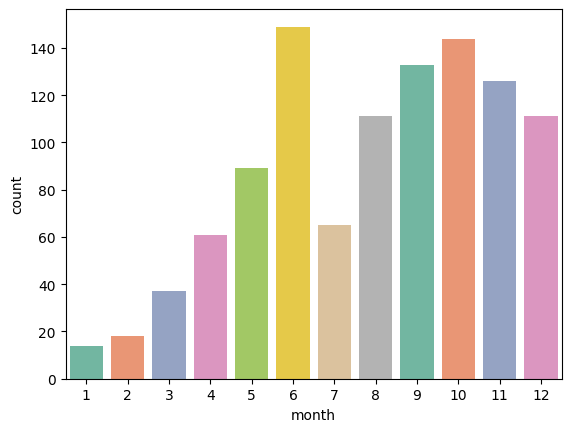

In [227]:
# sns.barplot(taxi.month.value_counts().reset_index(),x='month',y='count')
sns.countplot(taxi,x='month',palette="Set2")

12.А теперь – график по дням недели (weekday). Задать порядок столбиков на графике можно с помощью аргумента order, которому нужно передать список названий в нужном порядке. Например:
sns.countplot(data['column'], order=['One', 'Two', 'Three'])
Вопрос: в какой день недели суммарно поступает меньше всего заказов? Укажите то название, которое написано в самом датафрейме.

<ipython-input-225-1700814b4882>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(taxi['weekday'].value_counts().reset_index(),x='weekday',y='count',order=order,palette="Set2")


<Figure size 600x600 with 0 Axes>

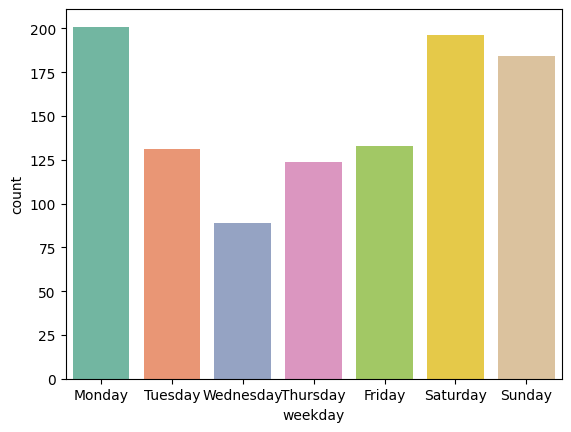

<Figure size 600x600 with 0 Axes>

In [225]:
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"]
sns.barplot(taxi['weekday'].value_counts().reset_index(),x='weekday',y='count',order=order,palette="Set2")
plt.figure(figsize=(6,6))
# sns.countplot(data=taxi,x='weekday',order=order)

13.Также мы можем посмотреть на несколько простых метрик, показывающих число уникальных пользователей за определённый период:
DAU (daily active users) – число уникальных пользователей за день  
WAU (weekly active users) – число уникальных пользователей за неделю
MAU (monthly active users) – число уникальных пользователей за месяц.
Активные пользователи – те, кто воспользовался приложением и сделал хотя бы один заказ за выбранный промежуток времени. Постройте график MAU и выберите верные утверждения.

In [266]:
taxi = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/3_taxi_peru.csv',
                   encoding='windows-1251',
                   sep=';')
taxi['start_at'] = pd.to_datetime(taxi['start_at'])
taxi['month']=taxi['start_at'].dt.month
mau = taxi.groupby('month',as_index=False)\
    .agg({'user_id':'nunique'})

In [267]:
mau

,month,user_id
0,1,102
1,2,111
2,3,163
3,4,254
4,5,275
5,6,309
6,7,318
7,8,377
8,9,416
9,10,437


<Axes: >

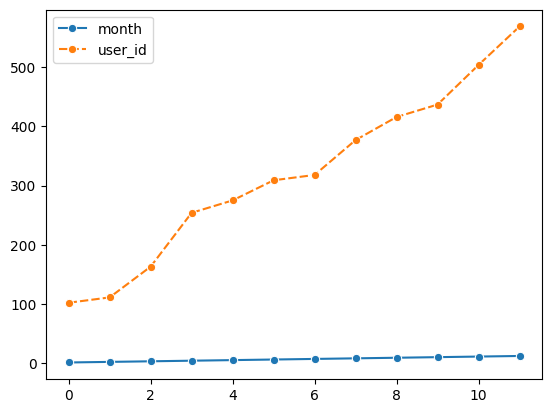

In [270]:
# mau.plot.line()
sns.lineplot(data=mau,marker='o')

<Axes: >

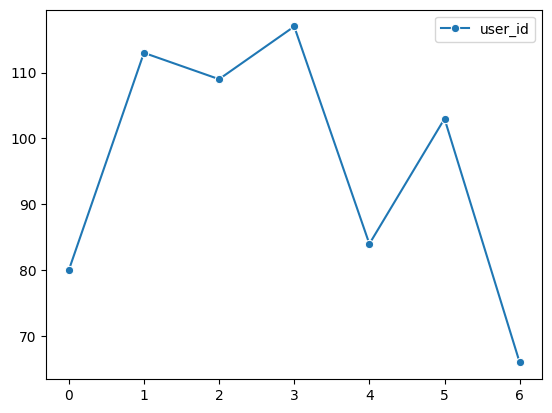

In [255]:
# wau.plot.line(x='weekday',y='user_id')
sns.lineplot(data=wau,marker='o')

In [243]:
wau

,weekday,user_id
0,Friday,80
1,Monday,113
2,Saturday,109
3,Sunday,117
4,Thursday,84
5,Tuesday,103
6,Wednesday,66


In [237]:
taxi['hour'] = taxi.start_at.dt.hour

In [238]:
taxi['hour']

,hour
11,3
51,19
67,22
83,22
157,23
...,...
23044,13
23047,13
23053,1
23063,15


In [240]:
dau = taxi.groupby('hour',as_index=False)\
    .agg({'user_id':'nunique'})

In [248]:
mau = taxi.groupby('month',as_index=False)\
    .agg({'user_id':'nunique'})
mau

,month,user_id
0,1,11
1,2,13
2,3,28
3,4,45
4,5,53
5,6,62
6,7,49
7,8,72
8,9,76
9,10,80


<Axes: >

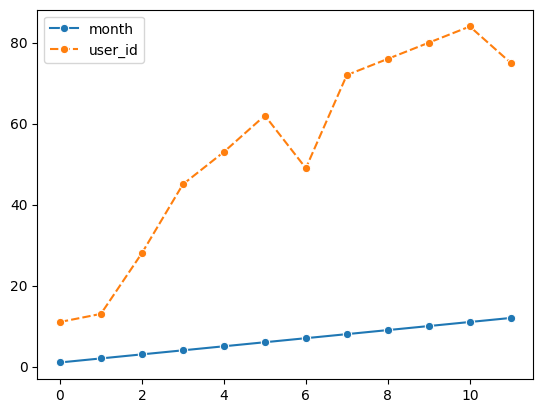

In [256]:
# mau.plot.line(x='month',y='user_id')
sns.lineplot(data=mau,marker='o')